In [2]:
from Mapping import Mapping
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plane_calculate_ransac import *
from PIL import Image, ImageDraw

# 1. Make map 2d for planification of robot

#### 1. need to find the floor plane 
to project the result to eliminate the influence of the floor and the ceiling 
#### 2. make map by using sparse matrix
as the map can be very large, use sparse matrix to save space
#### 3.(optical) visulize the map 
to see the map, we need to transform sparse matrix to array

### 1. 0 calculate the plane

In [10]:
N_POINTS = 200

# create random data
xs = [np.random.uniform(2*5)-0 for i in range(N_POINTS)]
ys = [np.random.uniform(2*5)-0 for i in range(N_POINTS)]
zs = []
for i in range(N_POINTS):
    zs.append(xs[i]*2 + ys[i]*3 + 5 + np.random.normal(scale=5))
    
pts = np.zeros((N_POINTS,3))
pts[:,0] = xs
pts[:,1] = ys
pts[:,2] = zs

In [12]:
fit = get_plane_from_points(pts)
fit =np.squeeze(np.asarray(fit))
print('the plane is :'+str(fit[0])[0:4]+'*x +'+str(fit[1])[0:4]+
          '*y - z +'+str(fit[2])[0:4]+'=0')

the plane is :1.92*x +2.83*y - z +6.20=0


In [13]:
fit = get_plane_from_points_ransac(pts,itera=50,thresh=0.5,ransac_rate=0.6)

the number of outliers is : 28
the plane is :2.03*x +2.45*y - z +7.86=0


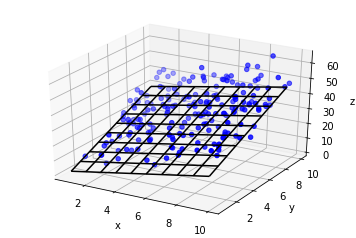

In [89]:
plt_3d_plane_and_pts(pts, fit)

#### 0.1 make the masks of the floor by hand
because we haven't yet the segmentation reliable

In [ ]:
idx = 5
polygon = [(200,340),(300,400),(280,480),(0,480)]
idx = 13
polygon = [(350,400),(460,450),(460,480),(20,480)]
idx = 80
polygon = [(400,380),(460,390),(600,480),(220,480)]
idx = 100
polygon = [(20,340),(300,380),(300,480),(0,480)]
idx = 115
polygon = [(330,380),(550,440),(550,480),(300,480)]
idx = 125
polygon = [(100,380),(280,440),(280,480),(0,480)]
idx = 135
polygon = [(260,390),(380,460),(360,480),(0,480)]
idx = 145
polygon = [(480,400),(510,460),(500,480),(0,480)]

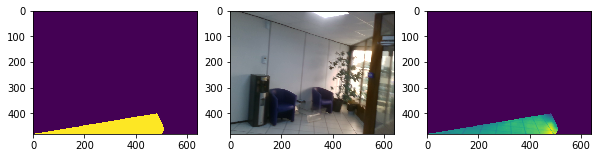

In [16]:
idx = 145
polygon = [(480,400),(510,460),(500,480),(0,480)]
if_save = True
image = np.load('IdvSlam/rgb/'+str(idx).zfill(3)+'.npy')
mask = make_mask_by_polygon(polygon)
plt.figure(figsize = (10,5))
plt.subplot(131); plt.imshow(mask)
plt.subplot(132); plt.imshow(image)
plt.subplot(133); plt.imshow(image[:,:,0]*mask)
if if_save:
    np.save('IdvSlam/floor/'+str(idx).zfill(3)+'.npy', mask)

### 1.1. initilization

In [2]:
doc = 'F:/pfe_2/realsense/frames'
Ms = np.load('IdvSlam/matrix.npy')
mapping = Mapping(doc, '')

In [9]:
idxs = [5,13,100,115,125,135,145]
plane = mapping.get_plane_from_masks(idxs, 0.8)
plane

the number of points is : 92768
the number of outliers is : 1149
the plane is :-2.3*x +0.02*y - z +5074=0


array([-2.33538824e+00,  2.79800637e-02, -1.00000000e+00,  5.07498979e+03])

In [45]:
plane = [-5.1,0.02,-1,2000]
mapping.set_floor(plane)
print(mapping.M_trans_floor)

[[-9.81306483e-01  7.40603605e-04 -3.70301802e-02  3.92156863e+02]
 [-7.40603605e-04 -9.07953017e-01  1.46706934e-03  0.00000000e+00]
 [ 3.70301802e-02  1.46706934e-03 -9.81277142e-01  0.00000000e+00]]


####  1.1 make point cloud transformed onto the floor

In [42]:
mapping.make_ply_on_floor(40)

[========================================================================] 100%


the result ply file projected on a plane (x=0) 
![title](img/on_plane.PNG)

### 1.2. make map

In [33]:
mapping.set_height_range(50,100)
mapping.set_square_size(200)

In [46]:
mapp, cam = mapping.get_map_2d([1,10,20,30,40,50,60,70,80,90,100])
# mapp, cam = mapping.get_map_2d([20,60,80,100])
print('the size of the map is :', mapp.shape)
print('the position of the original point is :', cam)

the size of the map is : (51, 51)
the position of the camera is : [26.37141305 33.97309424]


### 1.3. visulization

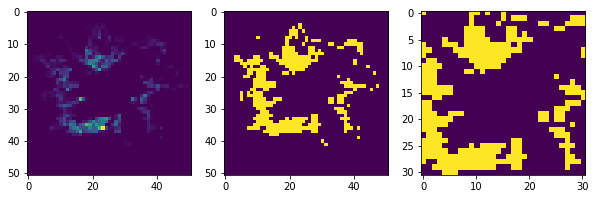

In [62]:
map_array1 = mapp.toarray()
map_array = mapping.refine_map2d(mapp, 20).toarray()
plt.figure(figsize = (10,5))
plt.subplot(131); plt.imshow(map_array1)
plt.subplot(132); plt.imshow(map_array)
plt.subplot(133); plt.imshow(map_array[8:-12,10:-10])

# 2. Make 3d map - for minecraft

In [3]:
doc = 'F:/pfe_2/realsense/frames'
Ms = np.load('IdvSlam/matrix.npy')
mapping = Mapping(doc, '')
plane = [-5.1,0.02,-1,2000]
mapping.set_floor(plane)

In [4]:
mapping.set_height_range(0,2000)
mapping.set_square_size(100)
idxs = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
_, list_direction = mapping.get_map_3d(idxs)
xyz, blocks = mapping.minecraft_xyz_and_block( list_direction ,15)
np.save('xyz.npy',xyz)
np.save('blocks.npy', blocks)

[========================================================================] 100%


![title](img/mc_v2.PNG)

# 3. New map for test
take a new map from the entrance to our office. (upper test only had the map of entrance)

In [3]:
doc = 'F:/pfe_2/realsense/frames'
Ms = np.load('IdvSlam/matrix.npy')
mapping = Mapping(doc, '')
plane = [-5.1,-1.02,-2,2000]
mapping.set_floor(plane)

In [33]:
mapping.make_ply_on_floor(50)

[========================================================================] 100%


In [254]:
mapping.set_height_range(-2000,2000)
#mapping.set_height_range(50,100)
mapping.set_square_size(200)
mapp, cam = mapping.get_map_2d(np.arange(50,500,20))
map_array1 = mapp.toarray()
np.save('map_array_all.npy', map_array1)
# mapp, cam = mapping.get_map_2d([20,60,80,100])
print('the size of the map is :', mapp.shape)
print('the position of the original point is :', cam)

the size of the map is : (59, 48)
the position of the original point is : [19.02192388 31.49926839]


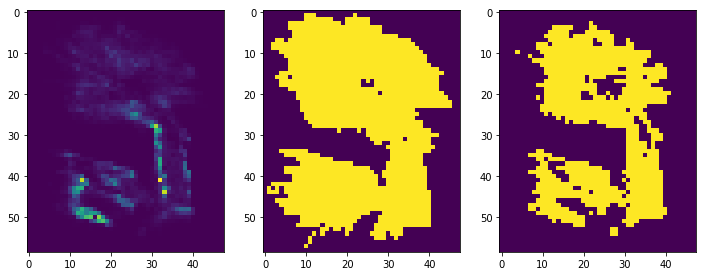

In [255]:
# range all
map_array = mapping.refine_map2d(map_array_all, 30)
map_array0 = mapping.refine_map2d(map_array_all, 1000)
plt.figure(figsize = (12,15))
plt.subplot(131); plt.imshow(map_array_all)
plt.subplot(132); plt.imshow(map_array)
plt.subplot(133); plt.imshow(map_array0)

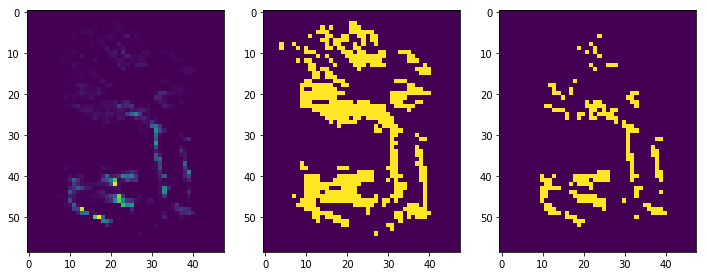

In [33]:
# range (50,100)
map_array = mapping.refine_map2d(map_array1, 50)
map_array0 = mapping.refine_map2d(map_array1, 300)
plt.figure(figsize = (12,15))
plt.subplot(131); plt.imshow(map_array1)
plt.subplot(132); plt.imshow(map_array)
plt.subplot(133); plt.imshow(map_array0)

In [257]:
map_array1 = np.load('map_array.npy')
map_array_all = np.load('map_array_all.npy')

In [13]:
mapping.set_height_range(-1000,3000)
mapping.set_square_size(100)
idxs = np.arange(50,400,10)
_, list_direction = mapping.get_map_3d(idxs)
xyz, blocks = mapping.minecraft_xyz_and_block( list_direction ,50)
np.save('xyz.npy',xyz)
np.save('blocks.npy', blocks)

[========================================================================] 100%


## 3.2 region inconnu

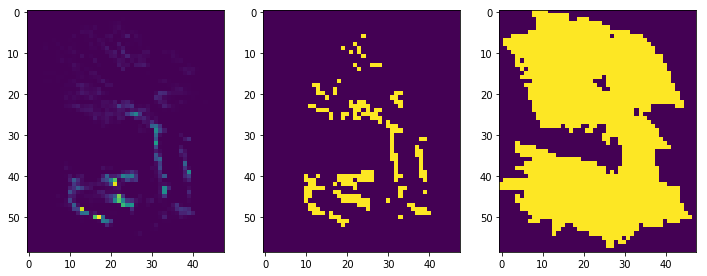

In [258]:
map_array = np.load('map_array.npy')
map_array_all = np.load('map_array_all.npy')
map_array1 = mapping.refine_map2d(map_array, 300)
map_array0 = mapping.refine_map2d(map_array_all, 1)
plt.figure(figsize = (12,15))
plt.subplot(131); plt.imshow(map_array)
plt.subplot(132); plt.imshow(map_array1)
plt.subplot(133); plt.imshow(map_array0)

In [251]:
def combine_2d_map(map_array, map_array_all):
    map_array1 = mapping.refine_map2d(map_array, 100)
    map_array0 = mapping.refine_map2d(map_array_all, 1)
    # out: 0: inconue,   11: occupy,   1: libre
    return map_array1*10 + map_array0

In [245]:
def refine_map2d(map_array):
    map_array[0,:] = 0
    map_array[map_array.shape[0]-1,:] = 0
    map_array[:,0] = 0
    map_array[:,map_array.shape[1]-1] = 0
    for i in range(1,map_array.shape[0]-1):
        for j in range(1,map_array.shape[1]-1):
            sum_round = map_array[i-1,j]+map_array[i+1,j]+map_array[i,j-1]+map_array[i,j+1]+\
                    map_array[i-1,j-1]+map_array[i+1,j-1]+map_array[i+1,j-1]+map_array[i+1,j+1]
            if map_array[i,j] == 1 and (sum_round < 6 or 10<sum_round<15 or 21<sum_round<25 or 32<sum_round<35):
                map_array[i,j] = 0
            if map_array[i,j] == 0 and  5<sum_round<10 :
                map_array[i,j] = 1
    return map_array

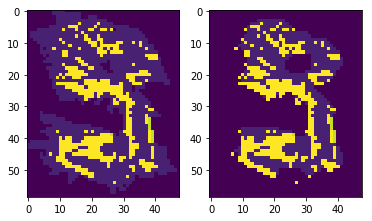

In [292]:
mapp = combine_2d_map(map_array, map_array_all)
plt.subplot(121);plt.imshow(mapp)
for i in range(5):
    mapp = refine_map2d(mapp)
plt.subplot(122);plt.imshow(mapp)

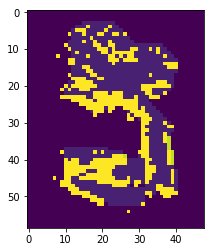

In [293]:
mapp = refine_updated(mapp)
plt.imshow(mapp)